In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

## Loading dataset

In [6]:
source = pd.read_csv("https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/car_sales.csv")

In [7]:
source.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data Preprocessing

## Handline Missing and Duplicate Data


In [8]:
df = source
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [9]:
df['Engine HP'].fillna(df['Engine HP'].mean(),inplace=True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean(),inplace=True)
df['Number of Doors'].fillna(df['Number of Doors'].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [13]:
df.duplicated().sum()

349

In [14]:
df.drop_duplicates(inplace=True,keep="first")

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [15]:
df.duplicated().sum()

0

## Handling outliers

(0.0, 1.0, 0.0, 1.0)

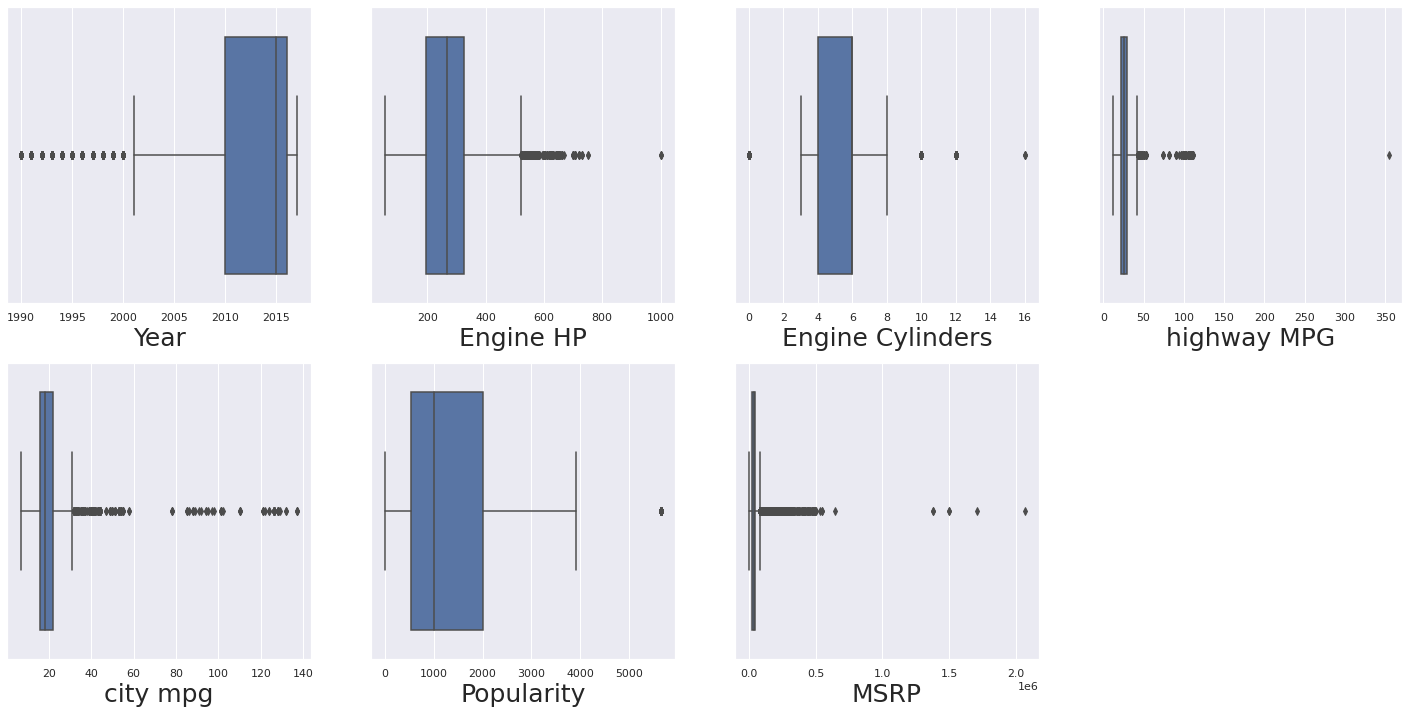

In [16]:
data = df
fig, axes =plt.subplots(2,4,figsize=(25,12))
ax= sns.boxplot(x="Year",data=data,ax=axes[0,0])
ax.set_xlabel("Year",fontsize=25)
ax= sns.boxplot(x="Engine HP",data=data,ax=axes[0,1])
ax.set_xlabel("Engine HP",fontsize=25)
ax= sns.boxplot(x="Engine Cylinders",data=data,ax=axes[0,2])
ax.set_xlabel("Engine Cylinders",fontsize=25)
ax= sns.boxplot(x="highway MPG",data=data,ax=axes[0,3])
ax.set_xlabel("highway MPG",fontsize=25)
ax= sns.boxplot(x="city mpg",data=data,ax=axes[1,0])
ax.set_xlabel("city mpg",fontsize=25)
ax= sns.boxplot(x="Popularity",data=data,ax=axes[1,1])
ax.set_xlabel("Popularity",fontsize=25)
ax= sns.boxplot(x="MSRP",data=data,ax=axes[1,2])
ax.set_xlabel("MSRP",fontsize=25)
axes[-1, -1].axis('off')

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 #to get the interquartile range
print(IQR)

Year                    6.0
Engine HP             130.0
Engine Cylinders        2.0
Number of Doors         2.0
highway MPG             8.0
city mpg                6.0
Popularity           1474.0
MSRP                23225.0
dtype: float64


In [18]:
#getting rid of the data that falls outside the inter quartile range 
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(0.0, 1.0, 0.0, 1.0)

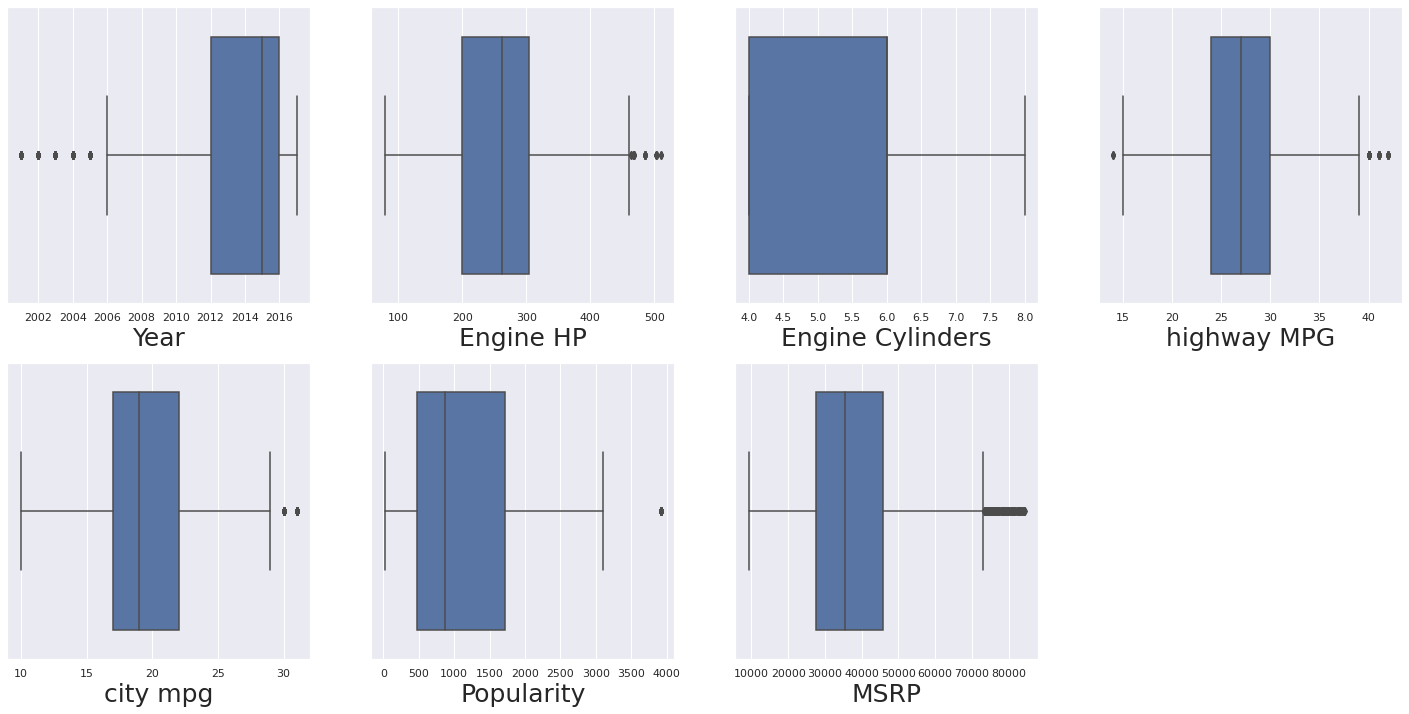

In [19]:
data = df
fig, axes =plt.subplots(2,4,figsize=(25,12))
ax= sns.boxplot(x="Year",data=data,ax=axes[0,0])
ax.set_xlabel("Year",fontsize=25)
ax= sns.boxplot(x="Engine HP",data=data,ax=axes[0,1])
ax.set_xlabel("Engine HP",fontsize=25)
ax= sns.boxplot(x="Engine Cylinders",data=data,ax=axes[0,2])
ax.set_xlabel("Engine Cylinders",fontsize=25)
ax= sns.boxplot(x="highway MPG",data=data,ax=axes[0,3])
ax.set_xlabel("highway MPG",fontsize=25)
ax= sns.boxplot(x="city mpg",data=data,ax=axes[1,0])
ax.set_xlabel("city mpg",fontsize=25)
ax= sns.boxplot(x="Popularity",data=data,ax=axes[1,1])
ax.set_xlabel("Popularity",fontsize=25)
ax= sns.boxplot(x="MSRP",data=data,ax=axes[1,2])
ax.set_xlabel("MSRP",fontsize=25)
axes[-1, -1].axis('off')

# Exploratory Data Analysis

## Descriptive analysis

### Statistical Measures of Data - Central Tendencies

In [20]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                 2013.478584
Engine HP             258.583583
Engine Cylinders        5.473573
Number of Doors         3.547611
highway MPG            26.978230
city mpg               19.529027
Popularity           1218.538053
MSRP                38076.098584
dtype: float64

In [21]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                 2015.0
Engine HP             261.5
Engine Cylinders        6.0
Number of Doors         4.0
highway MPG            27.0
city mpg               19.0
Popularity            873.0
MSRP                35550.0
dtype: float64

In [22]:
df.mode().T

,0
Make,Chevrolet
Model,Silverado 1500
Year,2016
Engine Fuel Type,regular unleaded
Engine HP,240.0
Engine Cylinders,4.0
Transmission Type,AUTOMATIC
Driven_Wheels,front wheel drive
Number of Doors,4.0
Market Category,Crossover


**Inferences:**

1.   Year, MSRP and MSRP have high difference between their mean and median. Hence, their data is a skewed distribution.
2.   Highway MGP and City MPG have very similar mean and median. Hence, their data is a symmetrical distribution.
3.   Most number of cars were made in 2016.
4.   Most number of cars have 4 doors.




### Statistical Measures of Data - Dispersion

In [23]:
Q1 = df.quantile(0.25)
print("First quartile:\n",Q1)
Q3 = df.quantile(0.75)
print("\nThird quartile:\n",Q3)
IQR = Q3 - Q1
print("\nInter Quartile Range:\n",IQR)

First quartile:
 Year                 2012.0
Engine HP             200.0
Engine Cylinders        4.0
Number of Doors         4.0
highway MPG            24.0
city mpg               17.0
Popularity            481.0
MSRP                27487.5
Name: 0.25, dtype: float64

Third quartile:
 Year                 2016.00
Engine HP             305.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            30.00
city mpg               22.00
Popularity           1720.00
MSRP                45748.75
Name: 0.75, dtype: float64

Inter Quartile Range:
 Year                    4.00
Engine HP             105.00
Engine Cylinders        2.00
Number of Doors         0.00
highway MPG             6.00
city mpg                5.00
Popularity           1239.00
MSRP                18261.25
dtype: float64


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5650.0,2013.478584,3.872867,2001.0,2012.0,2015.0,2016.00,2017.0
Engine HP,5650.0,258.583583,77.859447,79.0,200.0,261.5,305.00,510.0
Engine Cylinders,5650.0,5.473573,1.427085,4.0,4.0,6.0,6.00,8.0
Number of Doors,5650.0,3.547611,0.828089,2.0,4.0,4.0,4.00,4.0
highway MPG,5650.0,26.978230,5.117773,14.0,24.0,27.0,30.00,42.0
city mpg,5650.0,19.529027,4.115042,10.0,17.0,19.0,22.00,31.0
Popularity,5650.0,1218.538053,948.443116,21.0,481.0,873.0,1720.00,3916.0
MSRP,5650.0,38076.098584,14462.769188,9299.0,27487.5,35550.0,45748.75,84325.0


In [25]:
#Standard deviation
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Year                    3.872867
Engine HP              77.859447
Engine Cylinders        1.427085
Number of Doors         0.828089
highway MPG             5.117773
city mpg                4.115042
Popularity            948.443116
MSRP                14462.769188
dtype: float64

**Inferences**:
1.   Majority of cars have Highway MPG between 24 and 30, as the first quartile is 24 and the third quartile is 30. The median is 27 which shows that this data has a symmetrical distribution.
2.   Almost all of the cars manufactured have four doors, as both first and third quartile are equal to 4.
3.   Manufactured cars give better Highway MPG as compared to city MPG.
4.   The standard deviation values of the dataset show that Engine HP, Popularity and MSRP have the most spread out values among all cars manufactured. 


## Correlation between attributes

In [26]:
df.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.151797,-0.173466,0.120731,0.345980,0.321139,0.194573,0.226140
Engine HP,0.151797,1.000000,0.771445,-0.039623,-0.555941,-0.644406,0.090368,0.757133
Engine Cylinders,-0.173466,0.771445,1.000000,-0.002029,-0.709322,-0.748770,0.021536,0.517519
Number of Doors,0.120731,-0.039623,-0.002029,1.000000,-0.047353,0.001828,-0.099514,0.015401
highway MPG,0.345980,-0.555941,-0.709322,-0.047353,1.000000,0.924374,0.110725,-0.305885
city mpg,0.321139,-0.644406,-0.748770,0.001828,0.924374,1.000000,0.063943,-0.379678
Popularity,0.194573,0.090368,0.021536,-0.099514,0.110725,0.063943,1.000000,0.140745
MSRP,0.226140,0.757133,0.517519,0.015401,-0.305885,-0.379678,0.140745,1.000000


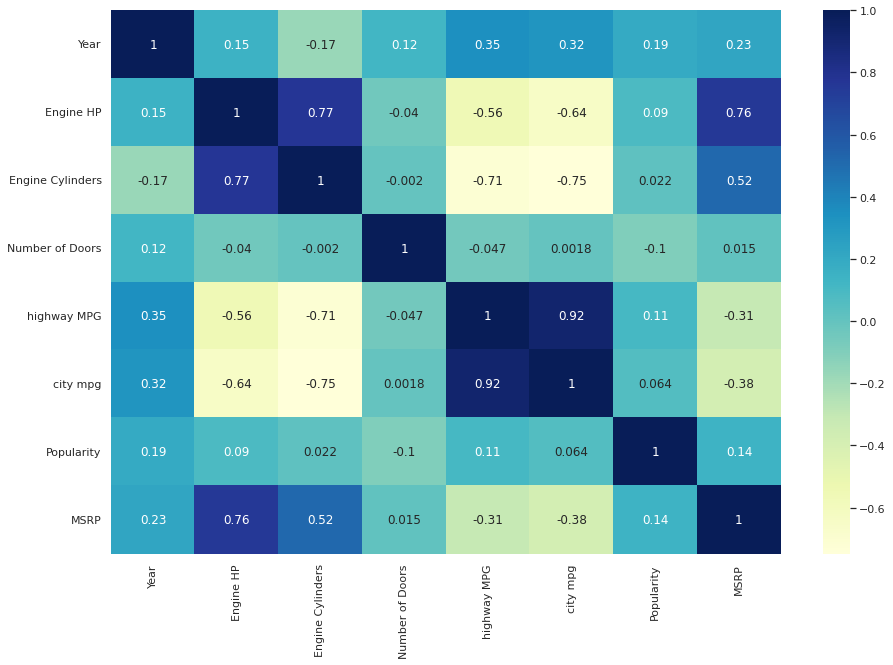

In [27]:
#Displaying a heatmap for this correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

### Observations:

#### Positive correlation:
1.   Cylinders and HP - higher the number of cyclinders higher will be the horse power.
2.   Highway mpg and City mpg - higher the highway mpg higher will be the city mpg.

#### Negative correlation:
1.   MPG and Cylinders - higher the number of cyclinders lesser will be the MPG.
2.   MPG and HP - higher the number of Power lesser will be the MPG.

#### No correlation:
1.   Highway mpg and Popularity
2.   City mpg and Popularity
3.   Cylinders and Popularity

## Asking and Answering Questions

### Question 1:
Has use of diesel cars increased or decreased over the years?

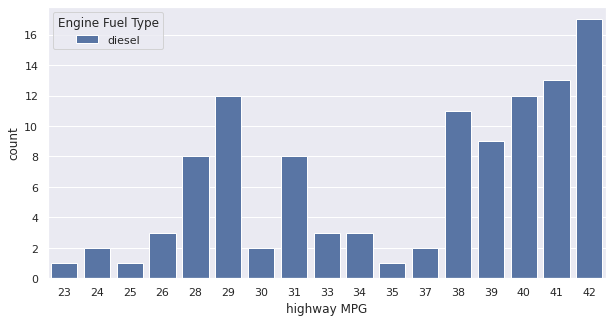

In [28]:
plt.figure(figsize=(10,5))
diesel_df = df[df['Engine Fuel Type'].str.contains('diesel')].copy()
ax = sns.countplot(x="highway MPG", hue="Engine Fuel Type", data=diesel_df)
plt.show()

**Answer:** Use of diesel cars increased steadily from 2010 to 2015. Thereafter, the usage has gone down drastically.

### Question 2: 
Do higher priced cars *come* with more powerful engines, that is, higher horsepower?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


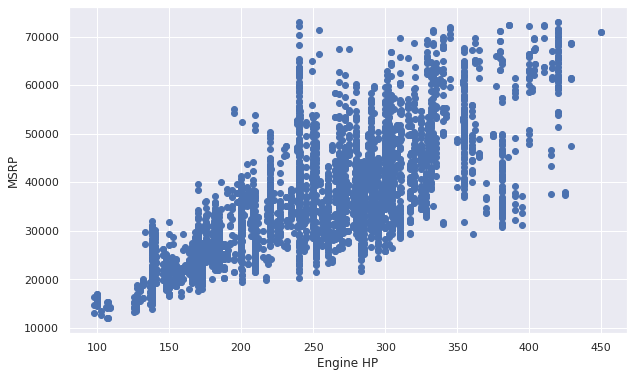

In [29]:
costly_df = df.copy()
Q1 = costly_df.quantile(0.25)
Q3 = costly_df.quantile(0.75)
IQR = Q3 - Q1
costly_df = costly_df[~((costly_df < (Q1-1.5 * IQR)) |(costly_df > (Q3 + 1.5 * IQR))).any(axis=1)]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(costly_df['Engine HP'], costly_df['MSRP'])
ax.set_xlabel('Engine HP')
ax.set_ylabel('MSRP')
plt.show()

**Answer:** Scatterplot above suggests that, yes higher priced cars do provide higher engine horse power.

### Question 3:
Has production of SUVs increased over the years?

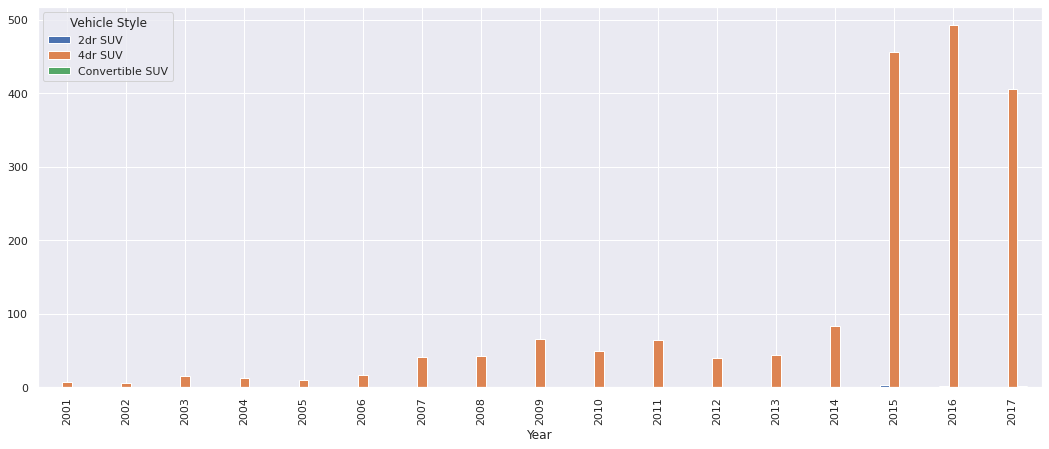

In [30]:
vs_df = df[df['Vehicle Style'].str.contains('SUV')].groupby(['Year', 'Vehicle Style']).size().reset_index(name="Count");
df_pivot =  pd.pivot_table(
    vs_df, 
    values="Count",
    index="Year",
    columns="Vehicle Style",
    aggfunc=np.mean
)
df_pivot.plot(kind="bar", figsize=(18, 7));

**Answer:** From the graph we can cleary see that SUV production has gone up significantly as compared to previous decades.

### Question 4:
Which brand is least popular and which one is most popular?

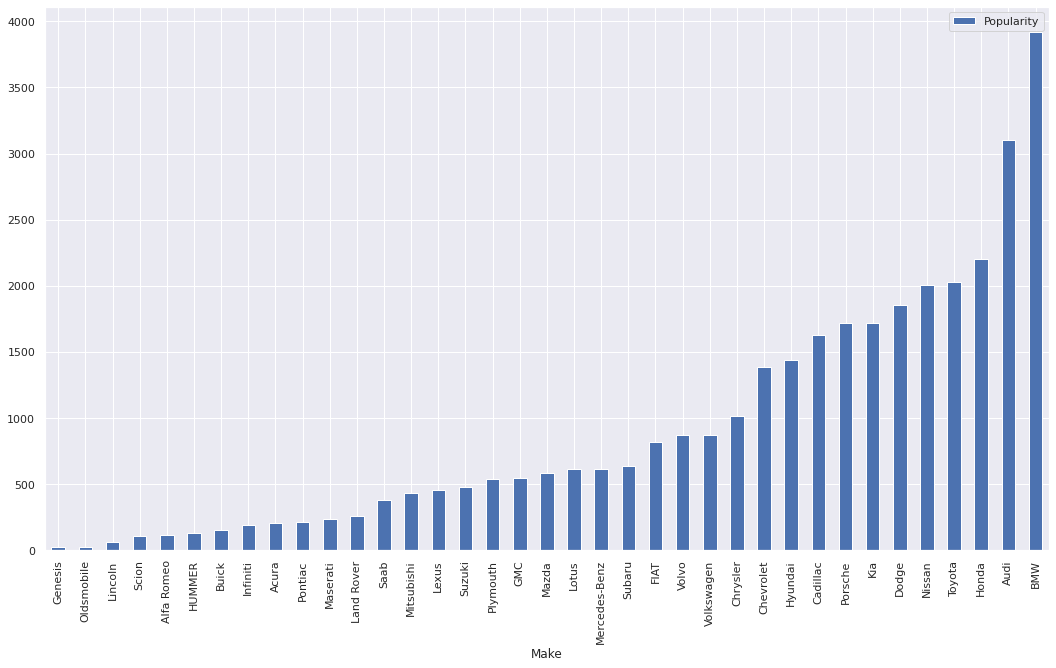

In [31]:
popcars_df = df[['Make', 'Popularity']].sort_values('Popularity')
popcars_df = popcars_df.drop_duplicates()
popcars_df.plot(kind="bar", x="Make", figsize=(18,10));

**Answer:** Genesis is least popular while BMW is the most popular brand.

### Question 5:
Does higher miles per gallon (MPG) value provide higher horse power?

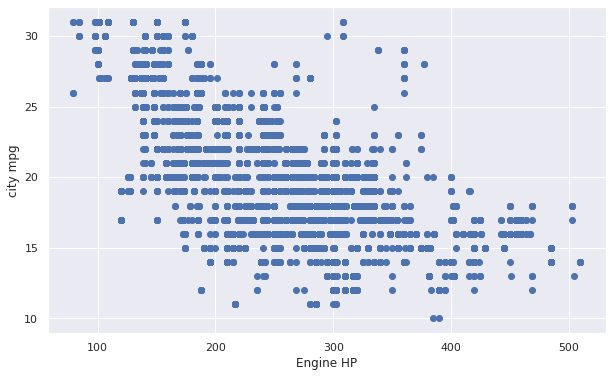

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Engine HP'], df['city mpg'])
ax.set_xlabel('Engine HP')
ax.set_ylabel('city mpg')
plt.show()

**Answer:** 
Scatterplot above suggests that, no, higher MPG value does not provide higher power.

# Data visualizations

## Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


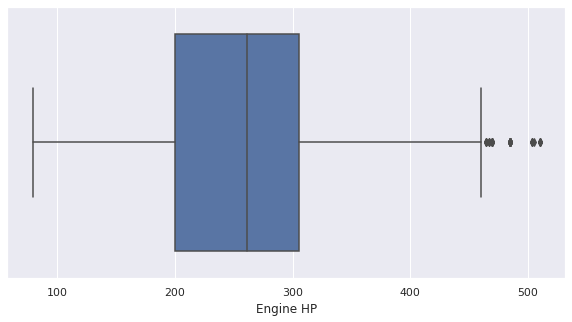

In [33]:
# BOXPLOT
plt.figure(figsize=(10,5))
sns.boxplot('Engine HP',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


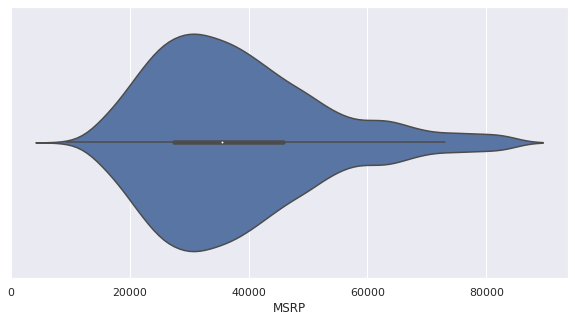

In [34]:
# VIOLIN PLOT
plt.figure(figsize=(10,5))
sns.violinplot('MSRP',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc07b06c810>,
      dtype=object)

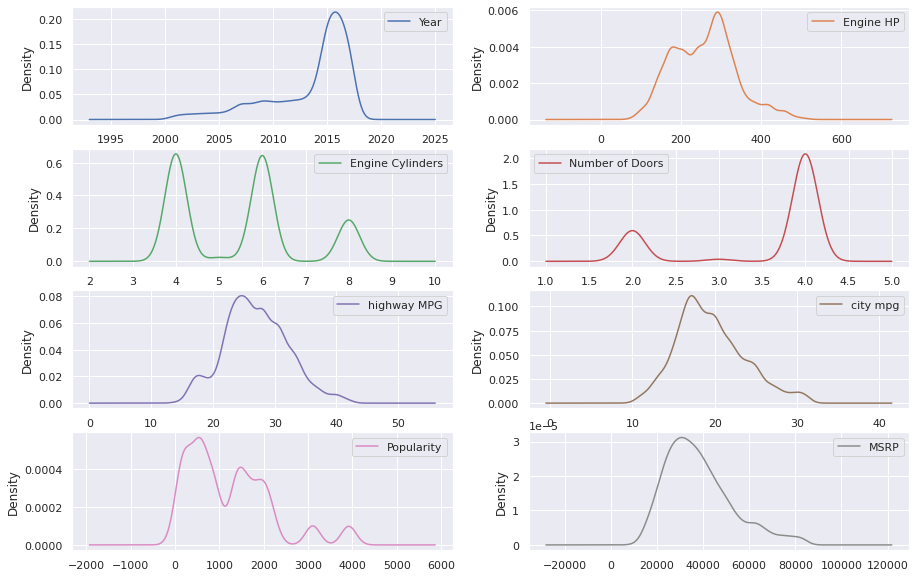

In [35]:
# DENSITY PLOT
df.plot(kind='density', subplots=True, layout=(4,2), sharex=False, figsize=(15,10))

## Bivariate Analysis

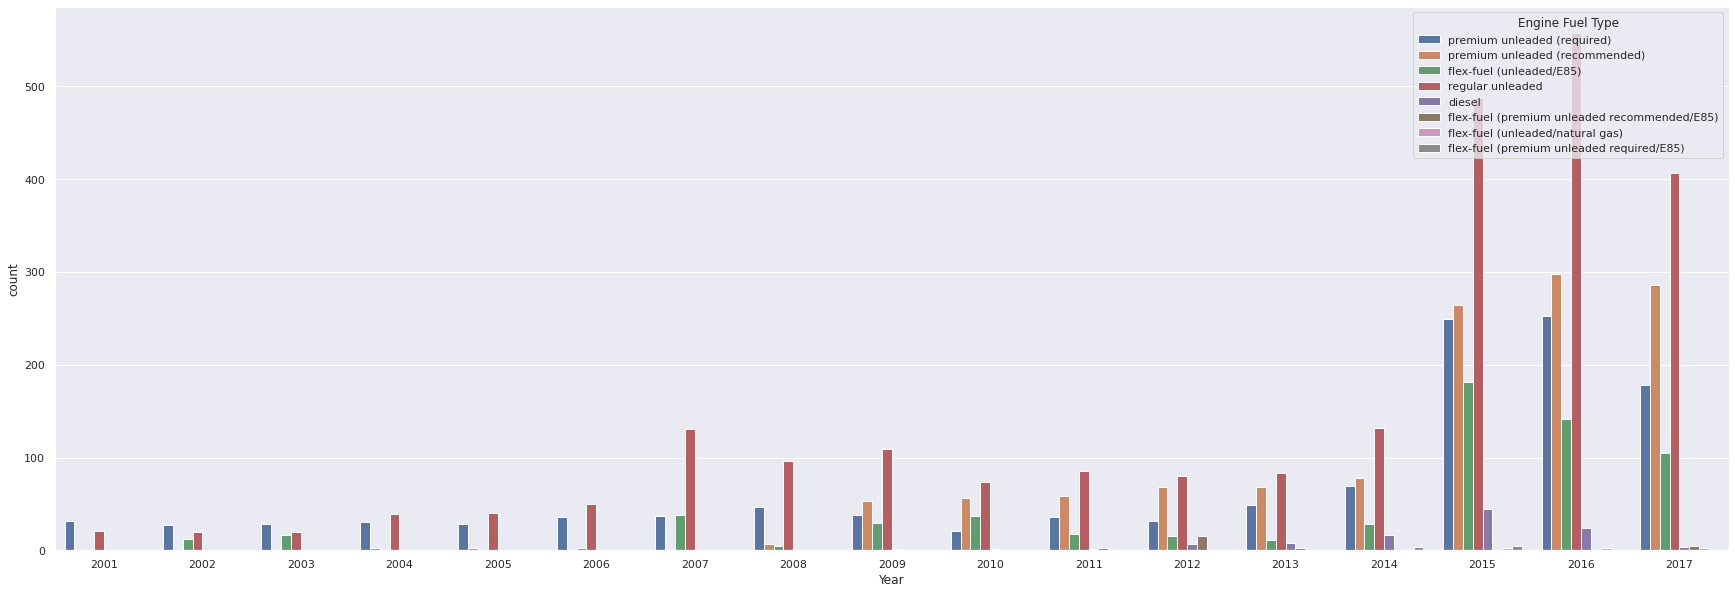

In [36]:
#BAR PLOT
plt.figure(figsize=(30,10))
ax = sns.countplot(x="Year", hue="Engine Fuel Type", data=df)
plt.show()

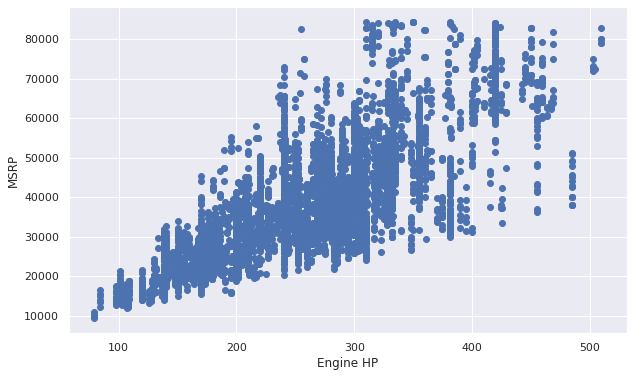

In [37]:
#SCATTER PLOT
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Engine HP'], df['MSRP'])
ax.set_xlabel('Engine HP')
ax.set_ylabel('MSRP')
plt.show()

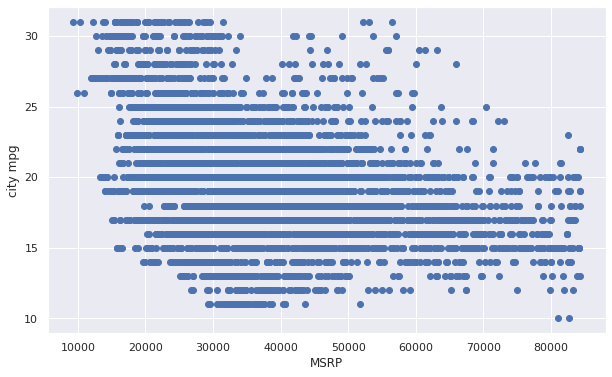

In [38]:
#SCATTER PLOT
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['MSRP'], df['city mpg'])
ax.set_xlabel('MSRP')
ax.set_ylabel('city mpg')
plt.show()

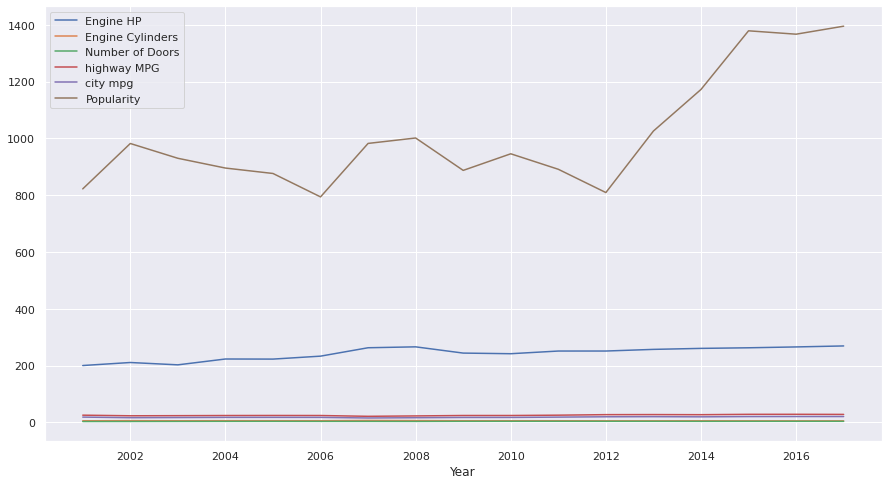

In [39]:
#LINE PLOT
df1 = df
df1 = df1.drop(['MSRP'], axis=1) 
df1.groupby(['Year']).mean().plot(figsize=(15,8))

## Graphs and some inferences drawn from them

Text(0.5, 1.0, 'Market share of Car Brands')

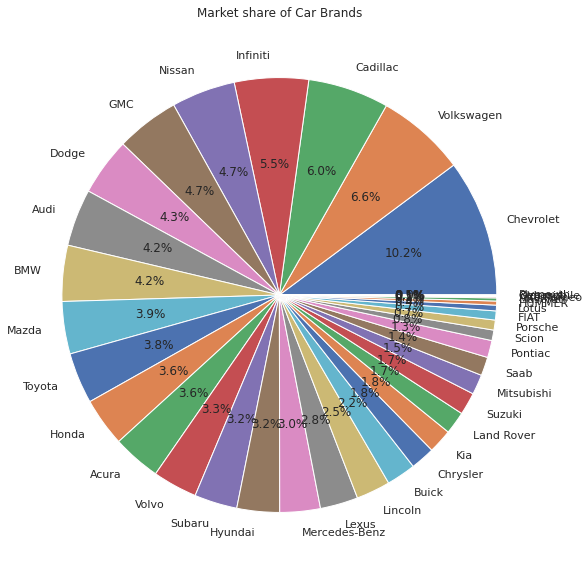

In [40]:
labels=df['Make'].value_counts().keys()
size=df['Make'].value_counts()
plt.figure(figsize=(15,10))
plt.pie(size,labels=labels,autopct="%.1f%%",)
plt.title("Market share of Car Brands")

**Conclusion**: Chevrolet sold the most number of cars

Text(0.5, 1.0, 'Market share of Transimission Type')

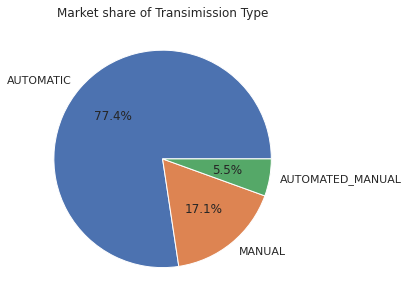

In [41]:
labels=["AUTOMATIC","MANUAL","AUTOMATED_MANUAL"]    
size=data["Transmission Type"].value_counts(ascending=False)
explode=[0,0.07,0.1,0.5]
colors=["blue","purple","red","black"]
plt.figure(figsize=(10,5))
plt.pie(size, labels=labels, autopct="%.1f%%")
plt.title("Market share of Transimission Type")

**Conclusion:** Most people prefer an automatic transmission car over other types

Text(0.5, 1.0, 'No of units sold per Vehicle Style')

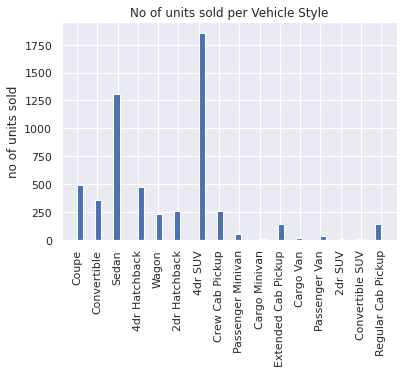

In [42]:
plt.hist(data["Vehicle Style"],bins=50)
plt.xticks(rotation=90)
plt.ylabel("no of units sold")
plt.title("No of units sold per Vehicle Style")

**Conclusion**: 4dr SUV was the most sold vehicle style.



Text(0.5, 1.0, 'No of units sold over the Years')

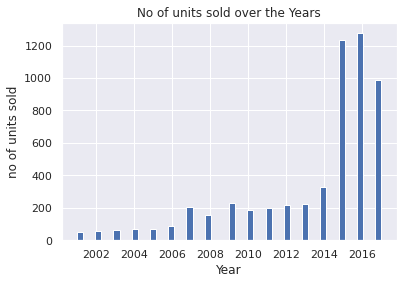

In [43]:
plt.hist(data["Year"],bins=50)
plt.xlabel("Year")
plt.ylabel("no of units sold")
plt.title("No of units sold over the Years")

**Conclusion**: In the year 2015 there was a spike in car sales

<BarContainer object of 8 artists>

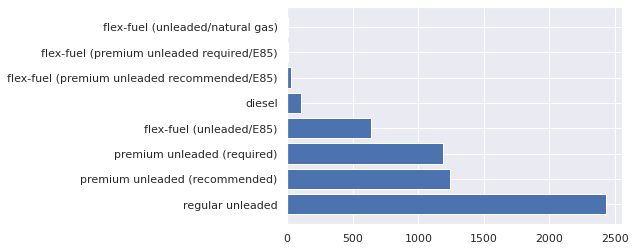

In [44]:
plt.barh(data['Engine Fuel Type'].value_counts(ascending=False).index[:10],data['Engine Fuel Type'].value_counts(ascending=False)[:10])

**Conclusion**: Regular unleaded is the most popular engine fuel type